### Receiver Operation Characteristic Curve

## TPR

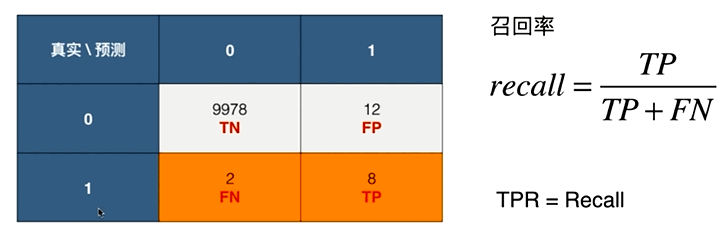

## FPR

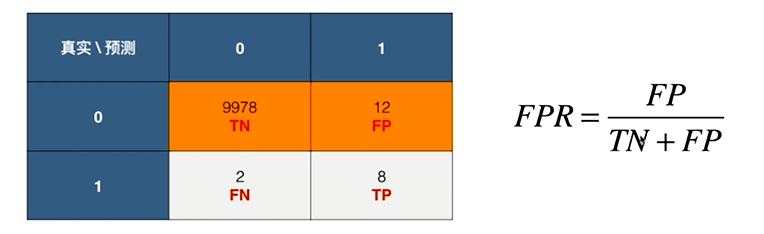

## TPR和FPR的关系

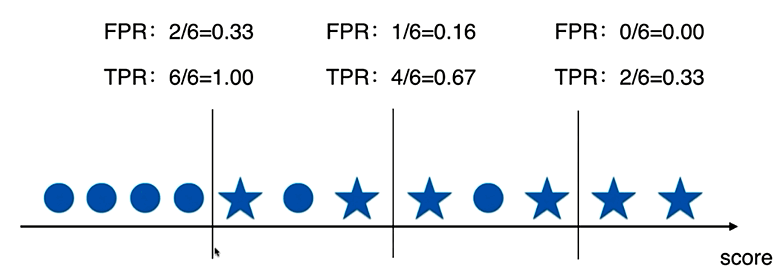

函数编写如下
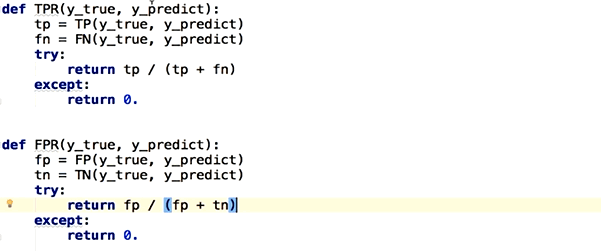

### ROC曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X, y)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

In [2]:
from turing.metrics import FPR, TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

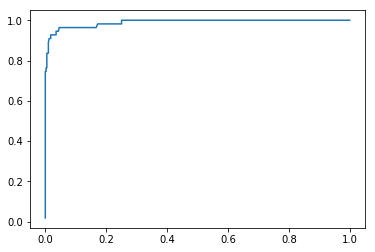

In [3]:
plt.plot(fprs, tprs)

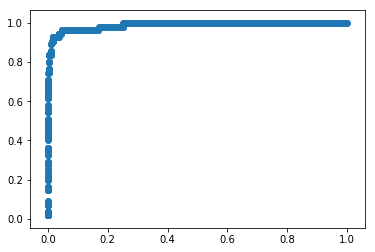

In [4]:
plt.scatter(fprs, tprs)

### 使用scikit-learn.org当中的ROC

In [5]:
from sklearn.metrics import roc_curve

In [6]:
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

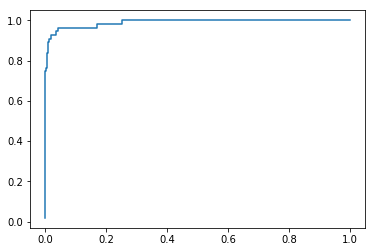

In [7]:
plt.plot(fprs, tprs)

经常关注的是这条曲线下面的面积

In [8]:
from sklearn.metrics import roc_auc_score

求曲线线面的面积

In [9]:
roc_auc_score(y_test, decision_scores)

0.9894131185270425

ROC曲线是比较多个模型，那个模型比较好

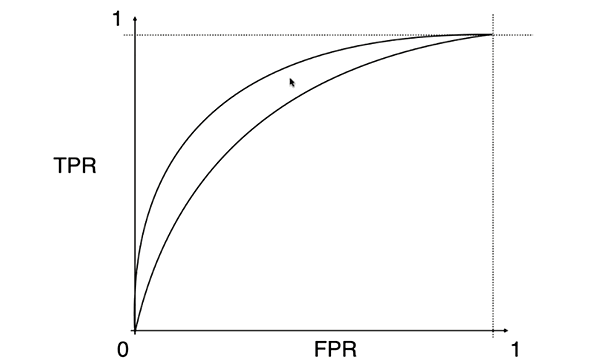